# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

Collaborators: ChatGPT (for help with scaffolding how to format some questions, to check my solutions to see if they output similar results, to help with some of the label and package formatting).

In [55]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn, poisson, norm

## 2.1 Plot $y = -3x^2 + 72x + 70$.

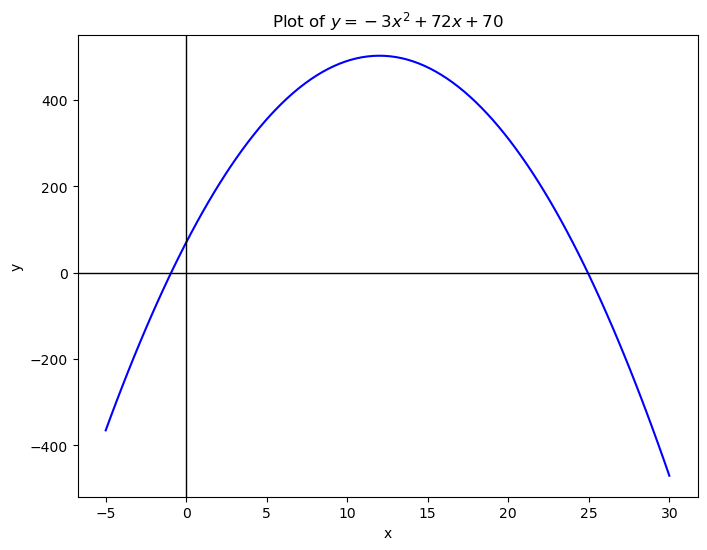

In [90]:
# define function y = f(x)
def f(x):
    return (-3 * (x**2)) + (72 * x) + 70

# define x/y values
x = np.linspace(-5,30,100)
y = f(x)

# plot 
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$y = -3x^2 + 72x + 70$', color='blue')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title("Plot of $y = -3x^2 + 72x + 70$")
plt.xlabel("x")
plt.ylabel("y")

plt.show()


## 2.3 Plot $f(x_1, x_2)$.

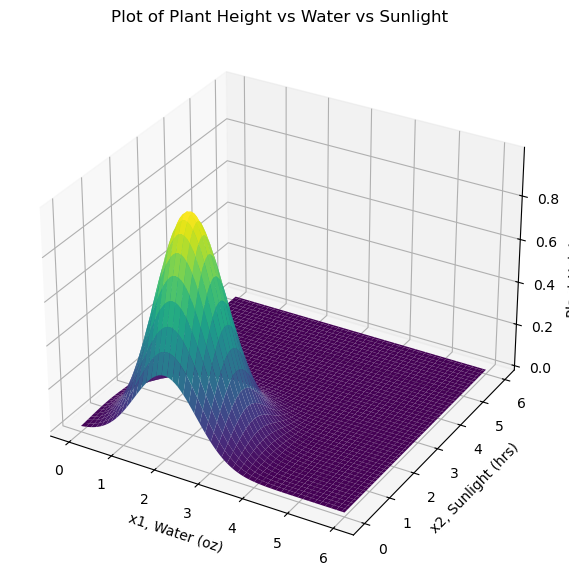

In [100]:
# define function f(x1, x2)
def f(x1, x2):
    return np.exp(-((x1 - 2)**2) - ((x2 - 1)**2))

# values
x1_values = np.linspace(0, 6, 100)
x2_values = np.linspace(0, 6, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
Y = f(X1, X2)

# create plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis', edgecolor='none')

# labels
ax.set_xlabel("x1, Water (oz)")
ax.set_ylabel("x2, Sunlight (hrs)")
ax.set_zlabel("Plant Height (mm)")
ax.set_title("Plot of Plant Height vs Water vs Sunlight")

plt.show()


## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

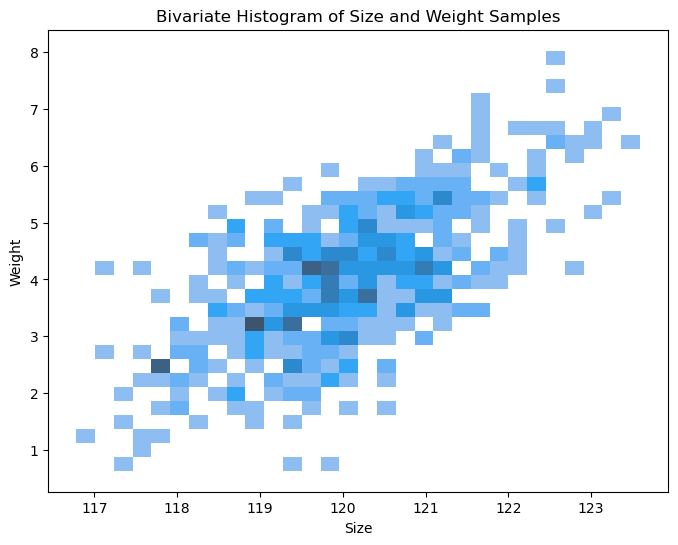

emperical means:  120.02722719101875 3.9913451004026466
theoretical means: [120, 4]


In [91]:
# parameters
mean = [120, 4]  
cov = [[1.5, 1], 
       [1, 1.5]]

samples = np.random.multivariate_normal(mean, cov, 500)

# find size and weight
S_samples = samples[:, 0]
W_samples = samples[:, 1]

# emperical means
mean_S = np.mean(S_samples)
mean_W = np.mean(W_samples)

# plot using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(x=S_samples, y=W_samples, bins=30, kde=True)

# plot labels
plt.xlabel("Size")
plt.ylabel("Weight")
plt.title("Bivariate Histogram of Size and Weight Samples")

plt.show()

# print empirical vs theoretical mean
print("emperical means: ",mean_S, mean_W)
print("theoretical means:", mean)

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

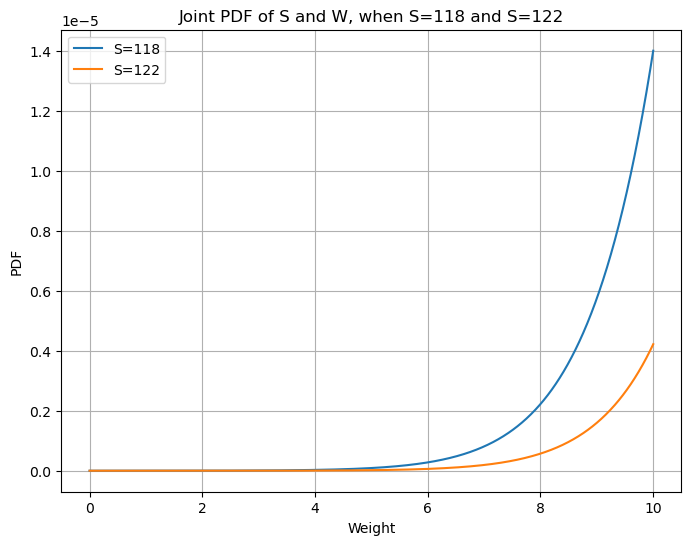

In [101]:
# parameters
mean = [120, 25] 
cov = [[30, 10],  
       [10, 20]]

bivariate_dist = mvn(mean, cov)

# S and W
s_values = [118, 122]  
w_values = np.linspace(0, 10, 1001)

# plot figure
plt.figure(figsize=(8, 6))
for s in s_values:
    matrix = np.column_stack((np.full_like(w_values, s), w_values))
    pdf_values = bivariate_dist.pdf(matrix)
    plt.plot(w_values, pdf_values, label=f"S={s}")

# plot label
plt.xlabel("Weight")
plt.ylabel("PDF")
plt.title("Joint PDF of S and W, when S=118 and S=122")
plt.legend()
plt.grid()

plt.show()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [72]:
# parameters
mean_W = 4 
mean_S = 120 
sigma_W = np.sqrt(1.5) 
sigma_S = np.sqrt(1.5) 
epsilon_mean = 0
epsilon_var = 5

# function for one simulation
def simulate_T_star():
    N = poisson.rvs(3)
    T_values = []
    for _ in range(N):
        W_i = norm.rvs(mean_W, sigma_W)
        S_i = norm.rvs(mean_S, sigma_S)
        epsilon_i = norm.rvs(epsilon_mean, np.sqrt(epsilon_var))
    
        T_i = 60 + 0.6 * W_i + 0.2 * S_i + epsilon_i
        T_values.append(T_i)

    T_star = np.sum(T_values)
    return T_star

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [99]:
# simulate 100 times and create array
T_star_samples = [simulate_T_star() for _ in range(1000)]

mean_T_star = np.mean(T_star_samples)
std_T_star = np.std(T_star_samples)

print(f"empirical mean: {mean_T_star}")
print(f"empirical standard deviation: {std_T_star}")


empirical mean: 260.1541816604014
empirical standard deviation: 151.92232390316812


# 4.1: Examining the Data

<function matplotlib.pyplot.show(close=None, block=None)>

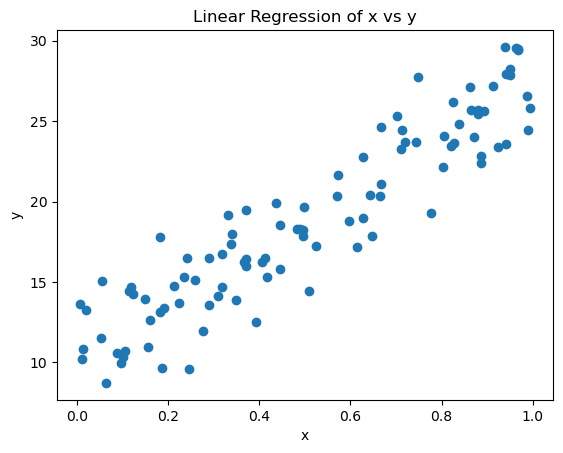

In [94]:
# edited solution
data = pd.read_csv("data/points.csv").values
x = data[:,0]
y = data[:,1]

# plot the data + label
plt.scatter(x,y)
plt.title("Linear Regression of x vs y")
plt.xlabel('x')
plt.ylabel('y')

plt.show

## 4.2: Adding the Intercept/Bias Term

In [76]:
# edited solution
intercept = np.ones((x.shape[0], 1))
X = np.hstack([intercept, x.reshape(-1, 1)])

print(X.shape)
print(y.shape)

(100, 2)
(100,)


## 4.4: Implementing the LinearRegression Class

In [95]:
# edited solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w

FileNotFoundError: [Errno 2] No such file or directory: 'img_output/hw0_p4_4.png'

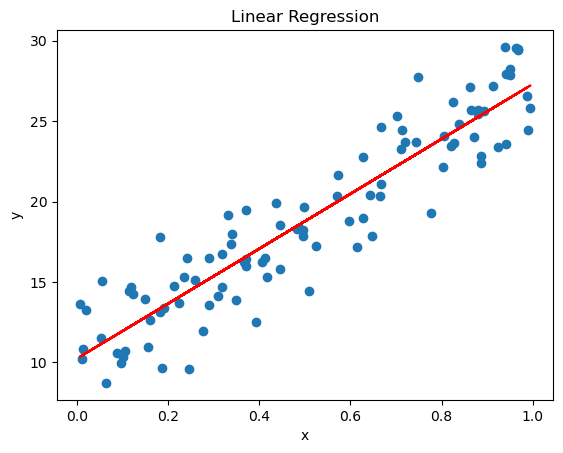

In [50]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [78]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)

4.439331220193983


In [97]:
# edited solution (vectorized using np)
mse = np.mean((y-y_pred)**2)
print(mse)

# We see the vectorized solution yields the same result.

4.439331220193985
